# Problem Descriptive

## Skin Cancer Problem

The main goal of this project is to classify whether the skin Cancer is malignant or benign.
For that Purpose we will make a comparative study of different models to finally find the
most efficient and accurate one for this problem.
The study consists of two main parts:
* The Preprocessing Part : <br>
   * Import the Data set
   * check the Dataset balancig
   * Data Visualization
   * Data Splitting
   * Data Normalization
* Machine Learning part :
   1. Using Scikitlearn
   * RandomForestClassifier
   * SupportVectorClassifier
   * MLP (Multilayer perceptron)
   * KnearestNeighborsClassifier
   2. Using Tensorflow (Deep Learning)
   * Convolutional Neural Networks
   * Solve Overffiting
   * Dynamic learning rate
   * Hyperparameters Tuning Using Bayesian Optimization
   * Confusion Matrix
   * Metrics




### Data Preprocessing

#### Import relevant libraries

In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import seaborn as sns
%matplotlib inline


#### The used Machine Learning algos 

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#### Set Data Paths

In [46]:
Bengin_train_path = './dataset/data/train/benign/'
Malignant_train_path = './dataset/data/train/malignant/'

Bengin_test_path = './dataset/data/test/benign/'
Malingant_test_path = './dataset/data/test/malignant/'

#### Convert Images into numpy arrays

In [47]:
# Convert Images into Numpy arrays
read_image_to_arr = lambda imname: np.asanyarray(Image.open(imname).convert('RGB'))
def transform_images_(folder_name):
    
    imgs_arr = [read_image_to_arr(os.path.join(folder_name, filename)) for filename in os.listdir(folder_name)]
    X = np.array(imgs_arr, dtype = 'uint8')
    
    return X

#### Splitting Dataset Into training and testing

In [48]:
#Training iamges 
X_bengin_train = transform_images_(Bengin_train_path)
X_malignant_train = transform_images_(Malignant_train_path)

#Testing images 
X_bengin_test = transform_images_(Bengin_test_path)
X_malignant_test = transform_images_(Malingant_test_path)

#### Creating Labels 


In [49]:
Y_bengin_train = np.zeros(X_bengin_train.shape[0])
Y_malignant_train = np.ones(X_malignant_train.shape[0])

Y_bengin_test = np.zeros(X_bengin_test.shape[0])
Y_malignant_test = np.ones(X_malignant_test.shape[0])
X_train = np.concatenate((X_bengin_train, X_malignant_train), axis=0)
X_test = np.concatenate((X_bengin_test, X_malignant_test), axis = 0)

y_train = np.concatenate((Y_bengin_train, Y_malignant_train), axis = 0)
y_test = np.concatenate((Y_bengin_test, Y_malignant_test), axis = 0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

#### Shuffle Dataset

In [ ]:
# For training dataset
random_train_samples = np.arange(X_train.shape[0])
np.random.shuffle(random_train_samples)
X_train = X_train[random_train_samples]
y_train = y_train[random_train_samples].astype(int)
# For Testing Dataset
random_test_samples = np.arange(X_test.shape[0])
np.random.shuffle(random_test_samples)
X_test = X_test[random_test_samples]
y_test = y_test[random_test_samples]


array([1193,   53, 1224, ..., 2241,  253, 2150])

#### Show the data balancing

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


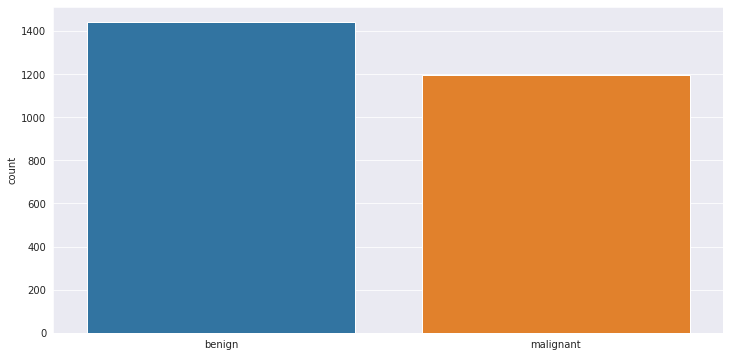

In [13]:
l = []
fig= plt.figure(figsize=(12,6))
for i in y_train:
    if(i == 1):
        l.append("malignant")
    elif (i==0):
        l.append("benign")
sns.set_style('darkgrid')
sns.countplot(l);

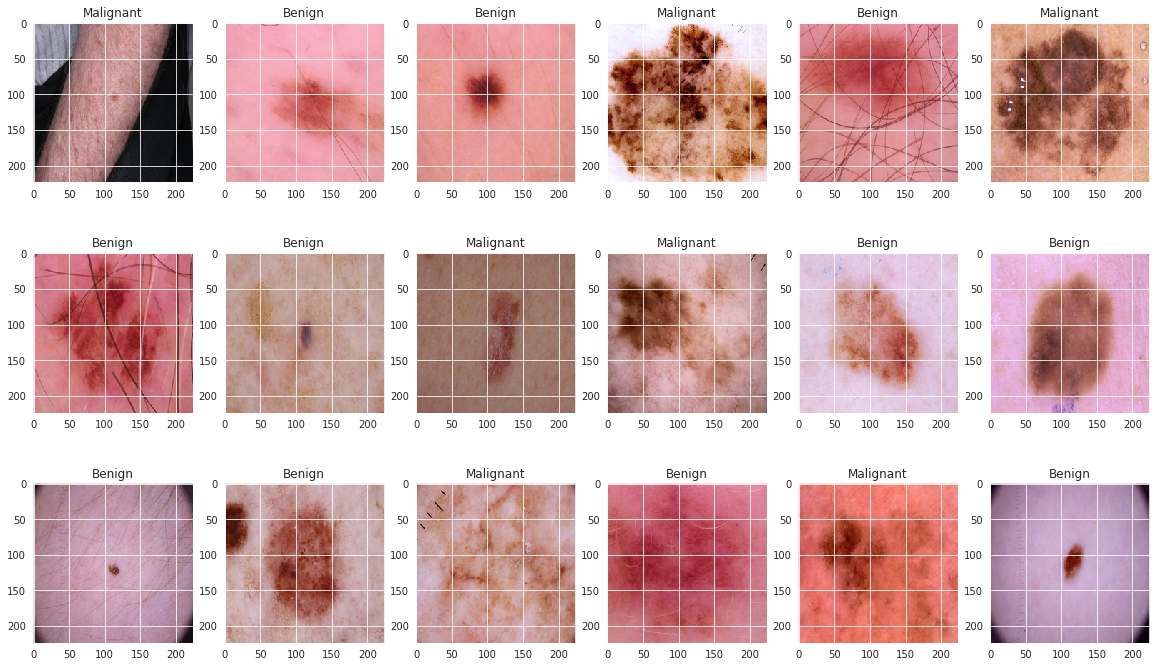

In [14]:
width, height = 40, 30
columns, rows = 6, 3
fig=plt.figure(figsize=(20,12))

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

#### Normalizing the Dataset

In [55]:
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255

#### Making a copy of data
Here we made a copy of the data for the purpose of reshaping it, sklean algorithms accepts only 2D arrays.
We will use our initial data later on when we will use convolutional neural networks

In [56]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [57]:
X_train_copy = X_train_copy.reshape(2637, -1)
X_test_copy = X_test_copy.reshape(660, -1)

#### Defining our algorithms

In [75]:
algorithms = [
    RandomForestClassifier(n_estimators=100),
    SVC(kernel='linear', C=1),
    MLPClassifier(hidden_layer_sizes=(100,100,100)),
    KNeighborsClassifier(n_neighbors=5)
]

In [110]:
for algorithm in algorithms:
    algorithm.fit(X_train_copy, y_train)
    y_pred = algorithm.predict(X_test_copy)
    print(confusion_matrix(y_test,y_pred))
    print(str(algorithm).replace('()',''))

    print(classification_report(y_test, y_pred))
    


RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       360
         1.0       0.77      0.86      0.82       300

    accuracy                           0.82       660
   macro avg       0.82      0.83      0.82       660
weighted avg       0.83      0.82      0.82       660

SVC(C=1, kernel='linear')
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       360
         1.0       0.79      0.73      0.76       300

    accuracy                           0.79       660
   macro avg       0.79      0.78      0.78       660
weighted avg       0.79      0.79      0.79       660

MLPClassifier(hidden_layer_sizes=(100, 100, 100))
              precision    recall  f1-score   support

         0.0       0.64      0.96      0.77       360
         1.0       0.88      0.36      0.51       300

    accuracy                           0.68       660
   macro avg       0.76      